In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/dataset_processed.csv')
data_encoded = pd.get_dummies(data)


data_encoded['target_class'] = pd.qcut(data_encoded['Specific capacity'], q=10, labels=False)
X = data_encoded.drop(['Specific capacity', 'target_class'], axis=1)
y = data_encoded['Specific capacity']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Active mass loading,...,Electrolyte_2M ZnSO4,Electrolyte_3M Zn(CF3SO3)2,Current collector_carbon cloth,Current collector_freestanding,Current collector_graphite paper,Current collector_nickel foam,Current collector_stainless steel,Current collector_stainless-steel foil,Current collector_stainless-steel mesh,Current collector_titanium foil
484,15.55,2.61,0.00,0.0,0.0,3139.20,1.740,2.217125,1.020,1.0,...,True,False,False,False,True,False,False,False,False,False
145,7.71,0.00,0.00,0.0,0.0,804.00,0.315,1.567164,0.970,1.2,...,False,False,False,False,False,False,False,False,True,False
491,15.55,2.61,0.00,0.0,0.0,3139.20,1.740,2.217125,1.020,1.0,...,True,False,False,False,True,False,False,False,False,False
463,8.35,2.41,0.00,0.0,0.0,2511.00,2.170,3.456790,2.070,1.5,...,False,True,False,False,False,False,False,False,True,False
216,4.89,1.74,0.00,0.0,0.0,1666.80,2.420,5.807535,0.880,2.5,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,8.35,2.41,0.00,0.0,0.0,2511.00,2.170,3.456790,2.070,1.5,...,False,True,False,False,False,False,False,False,True,False
224,6.42,2.75,0.00,0.0,0.0,1301.60,3.040,9.342348,0.920,2.5,...,True,False,False,False,False,False,False,False,True,False
375,3.37,0.00,0.00,0.0,0.0,3252.60,3.428,4.215704,1.020,1.0,...,False,False,False,False,False,False,False,False,True,False
340,6.75,2.16,1.16,0.0,0.0,2363.18,1.330,2.251204,0.790,1.0,...,False,False,False,False,False,False,True,False,False,False


In [2]:
statistics = X_train.describe(include='all')
statistics

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Active mass loading,...,Electrolyte_2M ZnSO4,Electrolyte_3M Zn(CF3SO3)2,Current collector_carbon cloth,Current collector_freestanding,Current collector_graphite paper,Current collector_nickel foam,Current collector_stainless steel,Current collector_stainless-steel foil,Current collector_stainless-steel mesh,Current collector_titanium foil
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505,505,505,505,505,505,505,505,505,505
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,266,455,475,478,469,488,449,492,305,484
mean,8.987525,2.980891,0.074099,0.139703,0.095248,1786.306040,1.280669,3.049981,1.241049,1.863782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.304356,2.826483,0.315978,0.562617,0.565955,896.356035,0.699970,1.464967,0.653385,1.769044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.900000,0.000000,0.000000,0.000000,0.000000,225.220000,0.100000,1.488390,0.700000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.150000,1.300000,0.000000,0.000000,0.000000,1021.000000,0.790000,2.147821,0.917000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.060000,2.440000,0.000000,0.000000,0.000000,1667.330000,1.200000,2.508328,1.020000,1.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,11.200000,3.670000,0.000000,0.000000,0.000000,2370.000000,1.740000,3.601896,1.120000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
median = statistics.iloc[5]
median

O                                           4.304356
N                                           2.826483
B                                           0.315978
S                                           0.562617
P                                           0.565955
Specific surface area                     896.356035
Pore volume                                  0.69997
Dap                                         1.464967
ID/IG                                       0.653385
Active mass loading                         1.769044
Potential window                            0.085919
Current density                            23.006274
micro%                                      0.236566
Electrolyte_1M Zn(CF3SO3)2                       NaN
Electrolyte_1M ZnSO4                             NaN
Electrolyte_2M ZnSO4                             NaN
Electrolyte_3M Zn(CF3SO3)2                       NaN
Current collector_carbon cloth                   NaN
Current collector_freestanding                

In [10]:
import pandas as pd
import numpy as np

# 固定列的值
fixed_values = {
    "O": 8.06,
    "N": 2.44,
    "B": 0.0,
    "S": 0.0,
    "P": 0.0,
    "Specific surface area": 1667.33,
    "Pore volume": 1.2,
    "Active mass loading": 1.5,
    "Potential window": 1.6,
    "micro%": 0.481865,
    "Current density": 0.2
}

# 生成等距分布的Dap和ID/IG的值
dap_values = np.linspace(1, 10, 50)
id_ig_values = np.linspace(0.5, 3, 10)

# 定义所有列名，包括独热编码的列
columns = [
    "O", "N", "B", "S", "P", "Specific surface area", "Pore volume", "Dap", "ID/IG", 
    "Active mass loading", "Potential window", "Current density", "micro%", 
    "Electrolyte", 
    "Current collector", 
]

# 创建一个空的DataFrame
data = []

# 填充数据
for dap in dap_values:
    for id_ig in id_ig_values:
        row = fixed_values.copy()
        row["Dap"] = dap
        row["ID/IG"] = id_ig
        row["Electrolyte"] = "2M ZnSO4"
        row["Current collector"] = "stainless-steel mesh"
        data.append(row)

df = pd.DataFrame(data, columns=columns)
df

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Active mass loading,Potential window,Current density,micro%,Electrolyte,Current collector
0,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,1.0,0.500000,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh
1,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,1.0,0.777778,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh
2,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,1.0,1.055556,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh
3,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,1.0,1.333333,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh
4,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,1.0,1.611111,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,10.0,1.888889,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh
496,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,10.0,2.166667,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh
497,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,10.0,2.444444,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh
498,8.06,2.44,0.0,0.0,0.0,1667.33,1.2,10.0,2.722222,1.5,1.6,0.2,0.481865,2M ZnSO4,stainless-steel mesh


In [12]:
df_generated = pd.read_csv('data/Out_31.csv')
df_encoded = pd.get_dummies(df_generated)
df_encoded

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Active mass loading,...,Electrolyte_2M ZnSO4,Electrolyte_3M Zn(CF3SO3)2,Current collector_carbon cloth,Current collector_freestanding,Current collector_graphite paper,Current collector_nickel foam,Current collector_stainless steel,Current collector_stainless-steel foil,Current collector_stainless-steel mesh,Current collector_titanium foil
0,8.06,2.44,0,0,0,1667.33,1.2,10.0,5.000000,1.5,...,False,False,False,False,False,False,False,True,False,False
1,8.06,2.44,0,0,0,1667.33,1.2,10.0,5.000000,1.5,...,False,False,False,False,False,False,True,False,False,False
2,8.06,2.44,0,0,0,1667.33,1.2,10.0,5.000000,1.5,...,False,True,False,False,False,True,False,False,False,False
3,8.06,2.44,0,0,0,1667.33,1.2,10.0,5.000000,1.5,...,True,False,False,False,True,False,False,False,False,False
4,8.06,2.44,0,0,0,1667.33,1.2,10.0,5.000000,1.5,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,8.06,2.44,0,0,0,1667.33,1.2,10.0,1.888889,1.5,...,True,False,False,False,False,False,False,False,True,False
503,8.06,2.44,0,0,0,1667.33,1.2,10.0,2.166667,1.5,...,True,False,False,False,False,False,False,False,True,False
504,8.06,2.44,0,0,0,1667.33,1.2,10.0,2.444444,1.5,...,True,False,False,False,False,False,False,False,True,False
505,8.06,2.44,0,0,0,1667.33,1.2,10.0,2.722222,1.5,...,True,False,False,False,False,False,False,False,True,False


In [13]:
# 将df_encoded的前7行删除
df_encoded = df_encoded.drop(df_encoded.index[:7])
df_encoded

,O,N,B,S,P,Specific surface area,Pore volume,Dap,ID/IG,Active mass loading,...,Electrolyte_2M ZnSO4,Electrolyte_3M Zn(CF3SO3)2,Current collector_carbon cloth,Current collector_freestanding,Current collector_graphite paper,Current collector_nickel foam,Current collector_stainless steel,Current collector_stainless-steel foil,Current collector_stainless-steel mesh,Current collector_titanium foil
7,8.06,2.44,0,0,0,1667.33,1.2,1.0,0.500000,1.5,...,True,False,False,False,False,False,False,False,True,False
8,8.06,2.44,0,0,0,1667.33,1.2,1.0,0.777778,1.5,...,True,False,False,False,False,False,False,False,True,False
9,8.06,2.44,0,0,0,1667.33,1.2,1.0,1.055556,1.5,...,True,False,False,False,False,False,False,False,True,False
10,8.06,2.44,0,0,0,1667.33,1.2,1.0,1.333333,1.5,...,True,False,False,False,False,False,False,False,True,False
11,8.06,2.44,0,0,0,1667.33,1.2,1.0,1.611111,1.5,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,8.06,2.44,0,0,0,1667.33,1.2,10.0,1.888889,1.5,...,True,False,False,False,False,False,False,False,True,False
503,8.06,2.44,0,0,0,1667.33,1.2,10.0,2.166667,1.5,...,True,False,False,False,False,False,False,False,True,False
504,8.06,2.44,0,0,0,1667.33,1.2,10.0,2.444444,1.5,...,True,False,False,False,False,False,False,False,True,False
505,8.06,2.44,0,0,0,1667.33,1.2,10.0,2.722222,1.5,...,True,False,False,False,False,False,False,False,True,False


In [14]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=80,
                             learning_rate=0.14,
                             subsample=0.5,
                             gamma=0.1,
                             max_depth=8,
                             min_child_weight=2,
                             reg_alpha=0.26,
                             colsample_bytree=0.7,
                             colsample_bylevel=1.0,
                             colsample_bynode=0.6,
                             random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
y_generated_pred = xgb.predict(df_encoded)

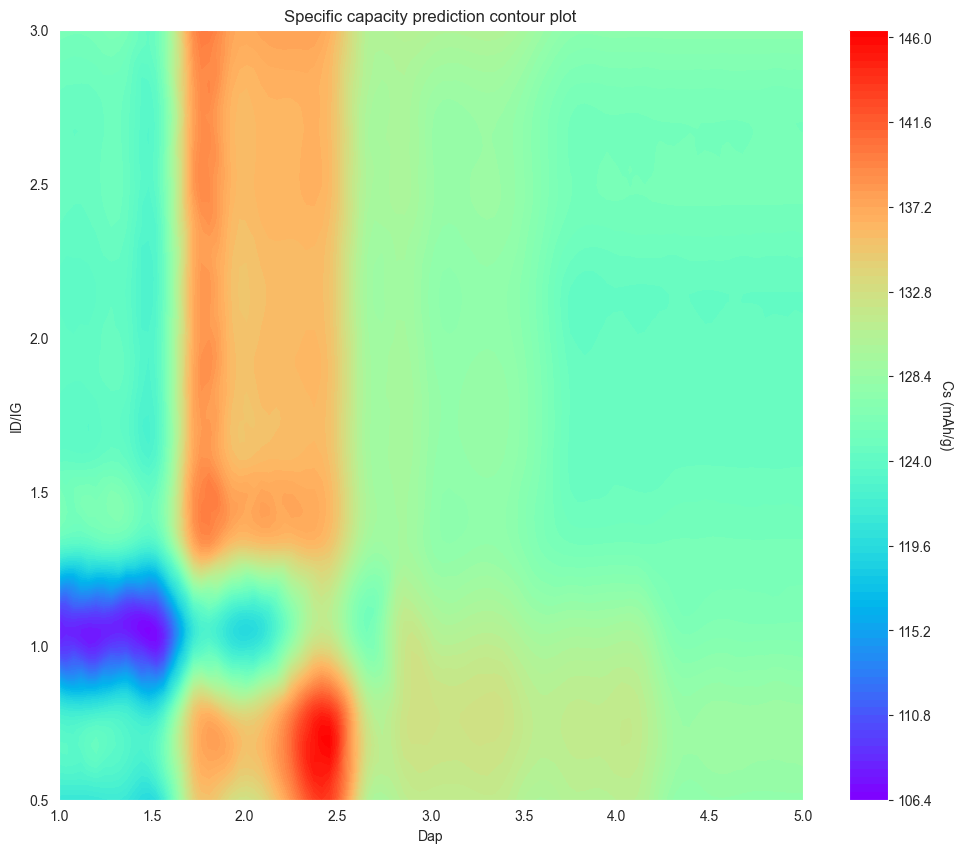

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 生成示例数据
# 这部分需要替换为你的实际数据
feature_1 = df_encoded['Dap']
feature_2 = df_encoded['ID/IG']
c = y_generated_pred

# 创建网格数据
x = np.linspace(1, 5, 100)
y = np.linspace(0.5, 3, 100)
X, Y = np.meshgrid(x, y)

# 插值
Z = griddata((feature_1, feature_2), c, (X, Y), method='cubic')

# 绘制等高线图
plt.figure(figsize=(12, 10))
contour = plt.contourf(X, Y, Z, levels=100, cmap='rainbow')
cbar = plt.colorbar(contour)
cbar.set_label('Cs (mAh/g)', rotation=270, labelpad=15)

# 设置轴标签和标题
plt.xlabel('Dap')
plt.ylabel('ID/IG')
plt.title('Specific capacity prediction contour plot')

plt.show()
